In [23]:
import pandas as pd

In [24]:
# Load the dataset
data_path = r'C:\Users\User PC\Desktop\DATA SET\assessment_centre_locations.csv'
df = pd.read_csv(data_path)

In [25]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2244 entries, 0 to 2243
Data columns (total 45 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   testing_enrolled           569 non-null    float64
 1   location_id                2244 non-null   int64  
 2   assessment_centre          299 non-null    float64
 3   location_name              2244 non-null   object 
 4   operated_by                871 non-null    object 
 5   city                       2244 non-null   object 
 6   address                    2241 non-null   object 
 7   address_fr                 171 non-null    object 
 8   postal_code                2243 non-null   object 
 9   province                   2244 non-null   object 
 10  latitude                   2243 non-null   float64
 11  longitude                  2243 non-null   float64
 12  phu                        2243 non-null   object 
 13  phone                      1197 non-null   objec

In [26]:
print("Numerical Columns:")
print(numerical_colums)

print("Categorical Columns:")
print(categorical_colums)

Numerical Columns:
Index(['testing_enrolled', 'location_id', 'assessment_centre', 'latitude',
       'longitude', 'appointments', 'phone_appointments', 'symptomatic',
       'drive_through', 'accessible', 'walk_ins', 'children_under_2',
       'public_transit', 'french_language_services', 'free_parking',
       'general_population', 'asl_interpretation', 'first_nations',
       'community_lab', 'vaccine_enrolled', 'pharmacy'],
      dtype='object')
Categorical Columns:
Index(['location_name', 'operated_by', 'city', 'address', 'address_fr',
       'postal_code', 'province', 'phu', 'phone', 'website', 'monday',
       'tuesday', 'wednesday', 'thursday', 'friday', 'additional_information',
       'saturday', 'sunday', 'online_appointments', 'age_threshold',
       'additional_information_fr', 'location_name_fr', 'weeks_pregnant',
       'email'],
      dtype='object')


In [27]:
print(df.isnull().sum())

testing_enrolled             1675
location_id                     0
assessment_centre            1945
location_name                   0
operated_by                  1373
city                            0
address                         3
address_fr                   2073
postal_code                     1
province                        0
latitude                        1
longitude                       1
phu                             1
phone                        1047
website                       159
monday                        107
tuesday                       109
wednesday                     104
thursday                      115
friday                        119
appointments                   34
phone_appointments            244
symptomatic                  1387
drive_through                2186
accessible                   2075
additional_information       1906
saturday                      192
sunday                        295
online_appointments           315
walk_ins      

In [28]:
# Check for duplicate rows
duplicates = df.duplicated()

# Print the number of duplicate rows
print(f'Number of duplicate rows: {duplicates.sum()}')

Number of duplicate rows: 0


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

Number of outliers in testing_enrolled: 0
Number of outliers in location_id: 87
     location_id
281         3432
282         3433
283         3434
284         3442
285         3452
..           ...
363        21077
364        22888
365        22889
366        22890
367        22891

[87 rows x 1 columns]
Number of outliers in assessment_centre: 0
Number of outliers in latitude: 277
       latitude
0     48.153552
25    45.431716
27    45.603834
29    45.544511
39    45.432380
...         ...
2219  46.453224
2222  45.445700
2224  50.098194
2231  46.451610
2234  49.012059

[277 rows x 1 columns]
Number of outliers in longitude: 556
      longitude
20   -76.189452
21   -75.696870
22   -75.653503
23   -75.690478
24   -74.718358
...         ...
2233 -76.252980
2234 -88.263057
2235 -76.029773
2236 -76.183799
2241 -75.729475

[556 rows x 1 columns]
Number of outliers in appointments: 0
Number of outliers in phone_appointments: 0
Number of outliers in symptomatic: 0
Number of outliers in driv

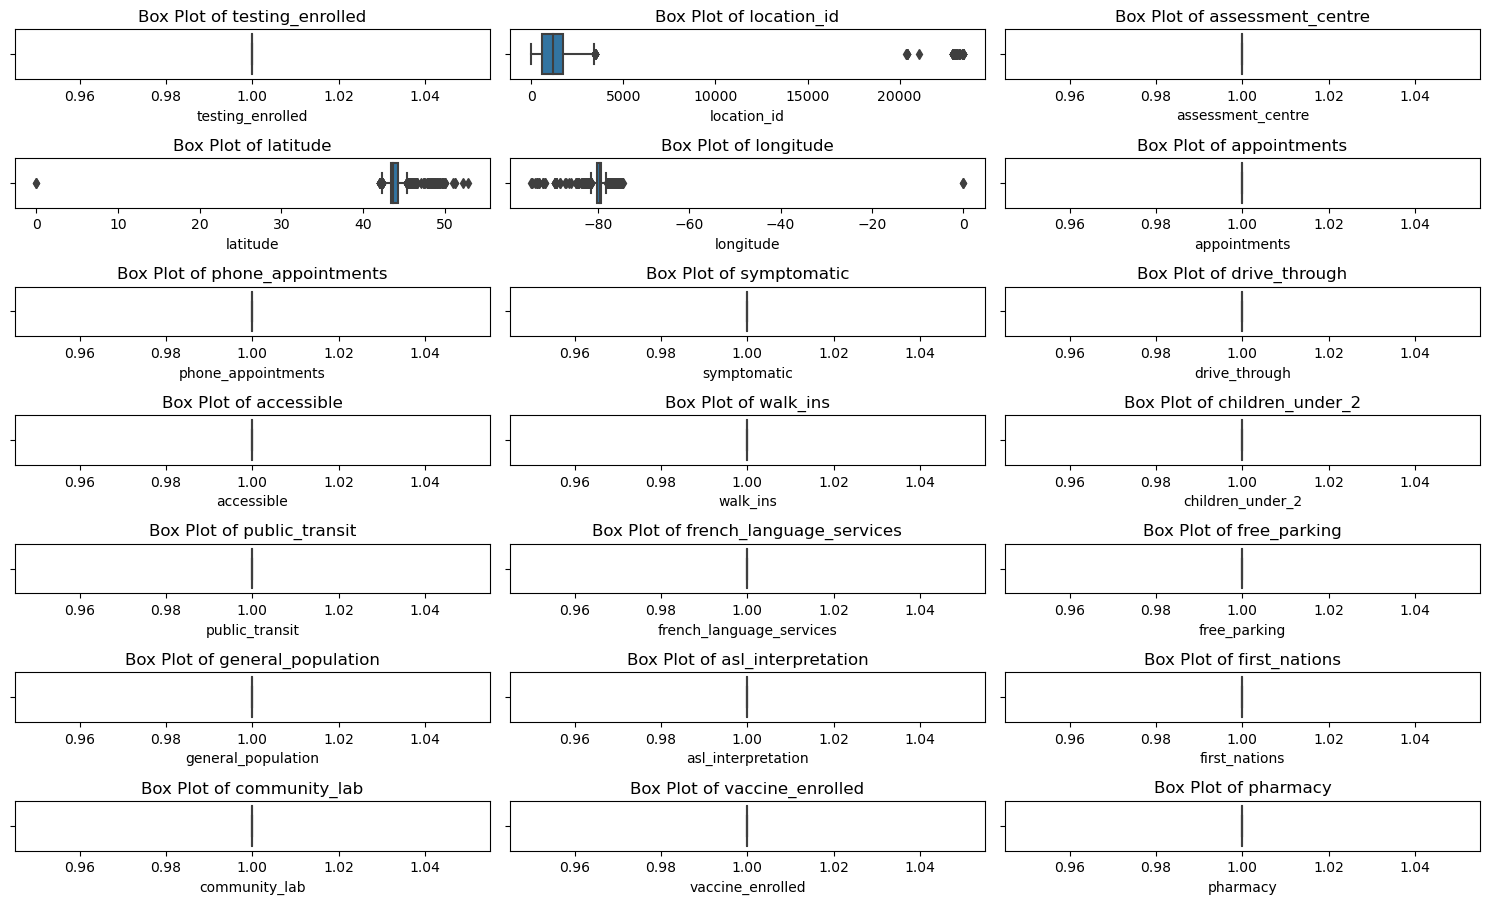

In [30]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# using IQR to detect outliers 
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Check for outliers in each numerical column
for col in numerical_cols:
    outliers = detect_outliers_iqr(df, col)
    print(f'Number of outliers in {col}: {len(outliers)}')
    if len(outliers) > 0:
        print(outliers[[col]])

# box plots the outliers 
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

In [31]:
# Calculate the number of missing values for each column
missing_values = df.isnull().sum()

# Calculate the percentage of missing values for each column
missing_percentage = (missing_values / len(df)) * 100

# Create a DataFrame to hold the results
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Display the missing data DataFrame
print(missing_data)

                           Missing Values  Percentage
testing_enrolled                     1675   74.643494
location_id                             0    0.000000
assessment_centre                    1945   86.675579
location_name                           0    0.000000
operated_by                          1373   61.185383
city                                    0    0.000000
address                                 3    0.133690
address_fr                           2073   92.379679
postal_code                             1    0.044563
province                                0    0.000000
latitude                                1    0.044563
longitude                               1    0.044563
phu                                     1    0.044563
phone                                1047   46.657754
website                               159    7.085561
monday                                107    4.768271
tuesday                               109    4.857398
wednesday                   

In [32]:
# Sort the DataFrame by the number of missing values in descending order
missing_data_sorted = missing_data.sort_values(by='Missing Values', ascending=False)

# Display the top attributes with the most missing data
print(missing_data_sorted.head(10))

                           Missing Values  Percentage
weeks_pregnant                       2242   99.910873
first_nations                        2236   99.643494
asl_interpretation                   2227   99.242424
email                                2226   99.197861
drive_through                        2186   97.415330
additional_information_fr            2185   97.370766
community_lab                        2184   97.326203
french_language_services             2180   97.147950
walk_ins                             2169   96.657754
general_population                   2167   96.568627


In [33]:
#Handling Missing Data
# Fill missing numerical values with the mean
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    df[column].fillna(df[column].mean(), inplace=True)

In [34]:
#Display missing values after filling
print("\nMissing values after filling:")
print(df[numerical_cols].isnull().sum())


Missing values after filling:
testing_enrolled            0
location_id                 0
assessment_centre           0
latitude                    0
longitude                   0
appointments                0
phone_appointments          0
symptomatic                 0
drive_through               0
accessible                  0
walk_ins                    0
children_under_2            0
public_transit              0
french_language_services    0
free_parking                0
general_population          0
asl_interpretation          0
first_nations               0
community_lab               0
vaccine_enrolled            0
pharmacy                    0
dtype: int64


In [35]:
# Fill missing categorical values with the mode
for column in df.select_dtypes(include=['object']).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [36]:
#Display missing values after filling
print("\nMissing values after filling:")
print(df[categorical_colums].isnull().sum())


Missing values after filling:
location_name                0
operated_by                  0
city                         0
address                      0
address_fr                   0
postal_code                  0
province                     0
phu                          0
phone                        0
website                      0
monday                       0
tuesday                      0
wednesday                    0
thursday                     0
friday                       0
additional_information       0
saturday                     0
sunday                       0
online_appointments          0
age_threshold                0
additional_information_fr    0
location_name_fr             0
weeks_pregnant               0
email                        0
dtype: int64


In [37]:
# Set the threshold for missing values
threshold = 96.0

In [38]:
#Identify columns to drop
columns_to_drop = missing_data[missing_data['Percentage'] > threshold].index

In [39]:
# Display the columns to drop
print("Columns to be dropped due to high missing values:")
print(columns_to_drop)

Columns to be dropped due to high missing values:
Index(['drive_through', 'walk_ins', 'additional_information_fr',
       'french_language_services', 'weeks_pregnant', 'general_population',
       'asl_interpretation', 'email', 'first_nations', 'community_lab'],
      dtype='object')


In [40]:
#Drop the identified columns
df_cleaned = df.drop(columns=columns_to_drop)
# Display the first few rows of the cleaned DataFrame
print("Data preview after dropping columns with high missing values:")
print(df_cleaned.head())


Data preview after dropping columns with high missing values:
   testing_enrolled  location_id  assessment_centre  \
0               1.0            1                1.0   
1               1.0            2                1.0   
2               1.0            3                1.0   
3               1.0            4                1.0   
4               1.0            5                1.0   

                                   location_name  \
0                  Blanche River Health-Kirkland   
1  South Georgian Bay Regional Assessment Centre   
2                      Midland Assessment Centre   
3                 COVID-19 Testing Clinic Milton   
4           Oakville Trafalgar Memorial Hospital   

                                 operated_by           city  \
0  Blanche River Health (Kirkland Lake site)  Kirkland Lake   
1            Georgian Bay Family Health Team    Collingwood   
2              Georgian Bay General Hospital        Midland   
3                                  FH Heal

In [41]:
# Calculate the number of columns before and after dropping
num_columns_before = df.shape[1]
num_columns_after = df_cleaned.shape[1]
num_columns_dropped = num_columns_before - num_columns_after
# Display the number of dropped columns
print(f'Number of columns dropped due to high missing values: {num_columns_dropped}')

Number of columns dropped due to high missing values: 10


In [42]:
# Handling Outliers

# Define a function to remove outliers using the IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Remove outliers for columns with significant outliers
df_no_outliers = df.copy()
df_no_outliers = remove_outliers_iqr(df_no_outliers, 'location_id')
df_no_outliers = remove_outliers_iqr(df_no_outliers, 'latitude')
df_no_outliers = remove_outliers_iqr(df_no_outliers, 'longitude')

In [43]:
# Save the cleaned dataset
df.to_csv('cleaned_assessment_centre_locations.csv', index=False)
print("Dataset saved successfully.")

Dataset saved successfully.


In [44]:
# Load the cleaned dataset
df.to_csv('cleaned_assessment_centre_locations.csv')

In [45]:
print(df.head())

   testing_enrolled  location_id  assessment_centre  \
0               1.0            1                1.0   
1               1.0            2                1.0   
2               1.0            3                1.0   
3               1.0            4                1.0   
4               1.0            5                1.0   

                                   location_name  \
0                  Blanche River Health-Kirkland   
1  South Georgian Bay Regional Assessment Centre   
2                      Midland Assessment Centre   
3                 COVID-19 Testing Clinic Milton   
4           Oakville Trafalgar Memorial Hospital   

                                 operated_by           city  \
0  Blanche River Health (Kirkland Lake site)  Kirkland Lake   
1            Georgian Bay Family Health Team    Collingwood   
2              Georgian Bay General Hospital        Midland   
3                                  FH Health         Milton   
4                 Halton Healthcare Servi